<a href="https://colab.research.google.com/github/Crisqin/Advance_Mechine_Learning/blob/main/2021_22_1_Optional_Tasks_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Tasks
These tasks are not mandatory, but you can earn bonus points by doing them. During the semester you can achieve around 36 points in total with the quizzes. (It may change a bit, but for now, you can calculate with that. Therefore, if you collect ~28.5 points, you can get a 5 without taking the exam.)

Don't use any Deep Learning frameworks (such as Keras, TensorFlow, PyTorch, etc.), and try to stick with the notebook's format.

Only complete solutions that are submitted before the deadline and work properly will be accepted. A short demo block is also required, where you show that it works.

At the beginning of your notebook, please note which tasks you solved.

## Tasks
Implement and create a short demo code for the following things **without using any DL frameworks** (only use numpy, scipy, matplotlib, and similar packages):
* Conv2D layer naive implementation (with a lot of for loops) (Lecture 5 and 7) [1 point]  -- **deadline: 2021.11.24**
  * Implement it in a vectorized format (using as few for loops as possible) and test it (Lecture 7) [+1 point]
* AveragePooling and MaxPooling layers (Lecture 5 and 7) [0.5 point] -- **deadline 2021.11.24**
  * If it's implemented in a vectorized format (without for loops) (Lecture 7) [+0.5 point]
* If you find and fix a bug, you can get +1 point. *Please, show clearly what was the bug and how you fixed it.* [+1 point/bug fixed]

*Note #1: The implementation details of each task can be found in the lecture notes.*

*Note #2: You can use the methods you implemented in the previous assignment.*

# MLP on BCWD dataset

This notebook contains a numpy implementation of a simple fully-connedted neural network. The components are in a Keras-like format. 
To demonstrate the usage we use the Breast Cancer Wisconsin (Diagnostic) Dataset, for which we train a binary classifier.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Optimizers

Optimizers are strategies to update the weight of the model.
SGD is the simplest one, but there are many more variants.

In [ ]:
class Optimizer:
  def update(self, param, grad):
    pass
  
  def __call__(self, param, grad):
    self.update(param, grad)
  
  
class SGD(Optimizer):
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
  
  def update(self, param, grad):
    '''Gradient Descent Update
    This function updates the given 'param' using the 'grad' (gradients). 
    The learning_rate controls the size of the updates. 
    Note: There are no return values, it modifies the 'param' variable.
    
    :param param: Parameters of the layer.
    :param grad: Corresponding gradients.
    '''
    param -= self.learning_rate * grad

# Weight Initializers

As its name suggests, weight initializers are used to initialize the parameters of a neural network.

Random initializer is a straightforward but too ideal way to set the initial weights.

In [ ]:
class WeigthInitializer:
  def initialize(self, size):
    return np.ones(size, dtype=np.float)
  
  def __call__(self, size):
    return self.initialize(size)
  

class RandomInitializer(WeigthInitializer):
  def __init__(self, mean=0, std=0.1):
    self.mean = mean
    self.std = std
    
  def initialize(self, size):
    '''Random number initializer
    It generates matrix shaped 'sized' with mean of 'self.mean' and standard deviation of 'self.std'.
    By default it return a matrix with a mean of 0 and std of 0.1.

    :param size: Dimensions of the matrix.
    :returns: A matrix of random numbers with dimensions specified by 'size'. 
    '''
    return (self.mean + self.std * np.random.standard_normal(size=size)).astype(dtype=np.float)

# Function class

Functions are used to implement methods, like activations, losses, regularizers, and layers. These functions have a forward and backward pass. The forward pass is executed in the evaluation phase, while the backward pass is to calculate the gradiends during training.

In [ ]:
class Function:
  def forward(self, input):
    return None  
  
  def __call__(self, input):
    return self.forward(input)
  
  def backward(self, grads):
    return None

## Activation functions

Activation functions introduce non-linearity into the network.


In [ ]:
class Activation(Function):
  def __init__(self):
    pass
  
  
class Linear(Activation):
  def forward(self, z):
    return z.astype(np.float)

  def backward(self, z):
    return np.ones_like(z, dtype=np.float)


class Relu(Activation):
  def forward(self, z):
    '''Forward pass of the Rectified Linear Unit activation function.

    :param z: Input tensor.
    :returns: ReLU(z), see the lecture notes for the definition. 
    '''
    return np.maximum(0., z.astype(np.float))

  def backward(self, z):
    '''Backward pass of the Rectified Linear Unit activation function.

    :param z: Input tensor.
    :returns: ReLU'(z), see the lecture notes for the definition. 
    '''
    return np.where(0 < z, 1., 0.).astype(np.float)

  
class Sigmoid(Activation):
  def forward(self, z):
    '''Forward pass of the Sigmoid activation function.

    :param z: Input tensor.
    :returns: sigmoid(z), see the lecture notes for the definition. 
    '''
    return 1 / (1 + np.exp(-z.astype(np.float)))
  
  def backward(self, z):
    '''Backward pass of the Sigmoid activation function.

    :param z: Input tensor.
    :returns: sigmoid'(z), see the lecture notes for the definition. 
    '''
    sig = self(z)
    return sig * (1 - sig)

## Loss functions

Loss functions are used to evaluate the performance of the model.

In [ ]:
class Loss(Function):
  def forward(self, y_true, y_pred):
    return None
  
  def __call__(self, y_true, y_pred):
    return self.forward(y_true, y_pred)
  
  def backward(self, y_true, y_pred):
    return None
  
  
class BinaryCrossentropy(Loss):
  def forward(self, y_true, y_pred):
    '''Forward pass of the Binary Crossentropy loss.
    Note: Both 'y_true' and 'y_pred' contains a batch of labels => y_true.shape == y_pred.shape == <batch size> x 1 

    :param y_true: Ground truth labels.
    :param y_pred: Predicted labels.
    :returns: Binary crossentropy loss, see the lecture notes for the definition. 
    '''
    return np.mean( (-y_true * np.log(y_pred + 1e-6) - (1 - y_true) * np.log(1 - y_pred + 1e-6)), axis=0)
  
  def backward(self, y_true, y_pred):
    '''Backward pass of the Binary Crossentropy loss.
    Note #1: The gradients have the same shape as y_pred (<batch size> x 1) 
    Note #2: Keep in mind that the derivative of the loss in the lecture notes is for a logistic regression model. Here, you do not need to derive respect to the weights! 

    :param y_true: Ground truth labels.
    :param y_pred: Predicted labels.
    :returns: Derivative of the binary crossentropy loss, see the lecture notes for the "definition". 
    '''
    return -np.divide(y_true, y_pred + 1e-6) + np.divide(1 - y_true, 1 - y_pred + 1e-6)

## Layers

A neural network composed of different kind of layers, such as fully-connected, convolutional, recurrent, etc.

In [ ]:
class Layer(Function):
  def __init__(self, activation, optimizer=None, weight_init=RandomInitializer(), *args, **kwargs):
    self.activation = activation
    self.optimizer = optimizer
    self.weight_init = weight_init
  
  def _forward(self, x):
    return None
  
  def forward(self, X):
    # General form: Activation(Input x weight + bias)
    self.X = X
    self.Z = self._forward(X)
    self.h = self.activation(self.Z)
    return self.h
  
  def _backward(self, dZ):
    return None, None
  
  def backward(self, dh):
    # Calculate derivatives and update the weights.
    dZ = dh * self.activation.backward(self.Z)
    self.dX, self.grads = self._backward(dZ)
    self._update_weights()
    return self.dX
  
  def _update_weights(self):
    assert len(self.params) == len(self.grads)
    for idx in range(len(self.params)):
      self.optimizer(self.params[idx], self.grads[idx])

### Fully-connected (dense) layer

In a fully-connected (dense) layer, each neuron is connected to all from the previous layer 

In [ ]:
class Dense(Layer):
  def __init__(self, size, *args, **kwargs):
    super(Dense, self).__init__(*args, **kwargs)
    self.W = self.weight_init(size)
    self.b = self.weight_init((1, size[1]))
    self.params = [self.W, self.b]
    
  def _forward(self, X):
    '''Forward pass of the dense layer.
    Note #1: We have two parameters: self.W (weight matrix) and self.b (bias vector).
    Note #2: Input times weight add a bias ==> activate is already taken care of! (see self.forward())

    :param X: Input matrix
    :returns: Linear combination, see the lecture notes for the definition.
    '''
    return np.dot(X, self.W) + self.b

  def _backward(self, dZ):
    '''Backward pass of the dense layer.
    Note: We need to use self.X (the input) as well.

    :param dZ: Gradient of the subsequent layer.
    :returns: A pair (dX and [dW, db]) which contains the partial derivatives respect to the input and to the parameters (W and b). See the lecture notes for the "definition".
    '''
    dW = np.dot(self.X.T, dZ) / len(self.X)
    db = np.sum(dZ, axis=0, keepdims=True) / len(self.X)
    dX = np.dot(dZ, self.W.T)
    return dX, [dW, db]

### Flatten

In [ ]:
class Flatten(Layer):
  def __init__(self, *args, **kwargs):
    super(Flatten, self).__init__(activation=Linear(), *args, **kwargs)
  
  def _forward(self, X):
    return X.reshape((len(X), -1))

  def _backward(self, dZ):
    return dZ.reshape(self.X.shape), []
  
  def _update_weights(self):
    pass

### Pooling layers

In [ ]:
class Maxpool2d(Layer):
  def __init__(self, *args, **kwargs):
    super(Maxpool2d, self).__init__(activation=Linear(), *args, **kwargs)
  
  def _forward(self, X):
    '''Forward pass of the max pooling layer.

    :param X: Input matrix
    :returns: Matrix (<batch_size> x <height>//2 x <width>//2 x <n_channels>) after max pooling, see the lecture notes for the definition.
    '''    
    self.mask = None  # TODO save the mask for later (_backward) use.
    return None  # TODO

  def _backward(self, dZ):
    '''Backward pass of the max pooling layer.
    Note: Use self.mask too.

    :param dZ: Gradient of the subsequent layer.
    :returns: A pair (dX and []) which contains the partial derivative respect to the input and an empty list. See the lecture notes for the "definition".
    '''
    dX = None  # TODO
    return dX, []
  
  def _update_weights(self):
    pass

In [ ]:
class Avgpool2d(Layer):
  pass  # TODO similarly to Maxpool2d

### Convolutional layer

In [ ]:
class Conv2d(Layer):
  def __init__(self, kernel_size, n_channels, n_kernels, pad, use_fast=False, *args, **kwargs):    
    super(Conv2d, self).__init__(*args, **kwargs)
    self.W = self.weight_init((kernel_size, kernel_size, n_channels, n_kernels))
    self.b = self.weight_init((1, 1, 1, n_kernels))
    self.params = [self.W, self.b]
    self.pad = pad
    self.use_fast = use_fast
  
  def _convolution_fast(self, Y):
    '''Optimized version of the convolution operation.
    Note #1: Use self.X, self.X_padded, self.W
    Note #2: There are no return values.
    Note #3: Don't forget to set the use_fast flag to True.
    
    :param Y: Destination (output) matrix (image), see the lecture notes for the "definition". 
    '''    
    pass  # TODO
    
  def _convolution_slow(self, Y):
    '''Naive version (with a bunch of for loops) of the convolution operation.
    Note #1: Use self.X, self.X_padded, self.W
    Note #2: There are no return values.
    Note #3: Both convolution and cross-correlation is acceptable.
    
    :param Y: Destination (output) matrix (image), see the lecture notes for the "definition". 
    '''    
    pass  # TODO

  def _forward(self, X):
    y_height = X.shape[1] - self.W.shape[0] + 2*self.pad + 1
    y_width = X.shape[2] - self.W.shape[1] + 2*self.pad + 1
    Y = np.zeros((X.shape[0], y_height, y_width, self.W.shape[3]), dtype=np.float16)
    
    if 0 < self.pad:
      X_padded = # TODO pad the input
    else:
      X_padded = X
    self.X_padded = X_padded
    
    if self.use_fast:
      self._convolution_fast(Y)
    else:
      self._convolution_slow(Y)
    
    Y += self.b
    return Y
  
  def _backward_fast(self, dZ):
    '''Optimized version of the backward pass (Optional).
    Note #1: Use self.X, self.X_padded, self.W
    Note #2: Don't forget to set the use_fast flag to True.
    
    :param dZ: Gradient of the subsequent layer.
    :returns: A pair (dX, dW and db) which contains the partial derivatives respect to the input and to the parameters (W and b). See the lecture notes for the "definition".
    '''    
    db = None
    dW = None
    dX = None
    return dX, dW, db

  def _backward_slow(self, dZ):
    '''Naive version (with a bunch of for loops) of the backward pass.
    Note: Use self.X, self.X_padded, self.W
    
    :param dZ: Gradient of the subsequent layer.
    :returns: A pair (dX, dW and db) which contains the partial derivatives respect to the input and to the parameters (W and b). See the lecture notes for the "definition".
    '''    
    db = None
    dW = None
    dX = None 
    return dX, dW, db
  
  def _backward(self, dZ):
    if self.use_fast:
      dX, dW, db = self._backward_fast(dZ)
    else:
      dX, dW, db = self._backward_slow(dZ)
    
    if 0 < self.pad:
      dX = dX[:, self.pad:-self.pad, self.pad:-self.pad, :]
    
    return dX, [dW, db]
    

# Callbacks

In [ ]:
# See: https://github.com/keras-team/keras/blob/master/keras/callbacks.py#L574

class Callback:
  def __init__(self):
    self.model = None

  def set_model(self, model):
    self.model = model

  def on_epoch_begin(self):
    pass

  def on_epoch_end(self):
    pass

  def on_batch_begin(self):
    pass

  def on_batch_end(self):
    pass

# Model class

The model class contains a list of layers and controls the flow of calculation.

In [ ]:
class Model:
  def __init__(self, layers=None, loss=None, optimizer=None, callbacks=None):
    self.layers = [] if layers is None else layers
    self.loss = loss
    self.optimizer = optimizer
    self.callbacks = [] if callbacks is None else callbacks
    self.history = []
  
  def add(self, layer):
    assert isinstance(layer, Layer)
    layer.optimizer = self.optimizer
    self.layers.append(layer)
  
  def train(self, x_train, y_train, n_epochs, batch_size, randomize=True):
    self.history = []
    for callback in self.callbacks:
      callback.set_model(self)
  
    for epoch in range(n_epochs):
      for callback in self.callbacks:
        callback.on_epoch_begin()
      
      idx_list = list(range(len(x_train)))
      if randomize:
        np.random.shuffle(idx_list)
      n_batches = (len(idx_list) + batch_size - 1) // batch_size
      loss = 0.
      
      for batch_idx in range(n_batches):
        for callback in self.callbacks:
          callback.on_batch_begin()
        data = x_train[idx_list[batch_idx * batch_size:(batch_idx + 1) * batch_size]]

        # forward pass
        for layer in self.layers:
          data = layer(data)
        
        # loss
        y_pred = data
        y_true = y_train[idx_list[batch_idx * batch_size:(batch_idx + 1) * batch_size]]
        batch_loss = self.loss(y_true, y_pred)
        loss += batch_loss

        # backward pass
        dh = self.loss.backward(y_true, y_pred)
        for layer in self.layers[::-1]:
          dh = layer.backward(dh)

        for callback in self.callbacks:
          callback.on_batch_end()
      
      print('Epoch {}/{}: loss: {}'.format(epoch+1, n_epochs, loss/n_batches))
      self.history.append(loss / n_batches)
      for callback in self.callbacks:
        callback.on_epoch_end()
  
  def predict(self, x_test, display=True):
    data = x_test
    for layer in self.layers:
      data = layer(data)
    return data

# Breast Cancer Wisconsin (Diagnostic) Dataset

For more information, see: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2021-10-06 13:10:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data.1’

wdbc.data.1         100%[===================>] 121.19K  --.-KB/s    in 0.1s    

2021-10-06 13:10:10 (819 KB/s) - ‘wdbc.data.1’ saved [124103/124103]



In [ ]:
filename = 'wdbc.data'

with open(filename, 'r') as file:
  lines = file.readlines()
  
words = [line.split(',') for line in lines]
data = words[:-1]

features = [[float(item) for item in rec[2:]] for rec in data]
features = np.array(features, dtype=np.float)

label_str_to_num = lambda label: 1. if label == 'M' else 0.
labels = [label_str_to_num(rec[1]) for rec in data]
labels = np.array(labels, dtype=np.float)

# removing records with missing features (if any feature == 0.)
missing_features = np.any(features == 0., axis=1)
features = features[~missing_features,:]
labels = labels[~missing_features]

print(features.shape)
print(labels.shape)

(556, 30)
(556,)


## Data exploration and Pre-processing
Here we:
* Print the distribution of the labels.
* Print the scales of each features. (min, max, avg, std)
* Randomly split the dataset into training and test sets. (Ratio is 80-20.)
  * After splitting we check that the distribution of the labels is similar.
* Normalize the data by each feature. (We use Z-score standardization.)

In [ ]:
np.random.seed(0)
train_mask = np.random.rand(len(features)) < 0.8

x_train = features[train_mask]
y_train = labels[train_mask]
x_test = features[~train_mask]
y_test = labels[~train_mask]

print('Training set:', x_train.shape)
print('Test set:', x_test.shape)
print('Distribution of the lables:\n\ttraining set:', np.unique(y_train, return_counts=True), '\n\ttest set:', np.unique(y_test, return_counts=True))

Training set: (451, 30)
Test set: (105, 30)
Distribution of the lables:
	training set: (array([0., 1.]), array([275, 176])) 
	test set: (array([0., 1.]), array([69, 36]))


In [ ]:
def normalize(data, mean=None, std=None):
  if mean is None or std is None:
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
  return (data - mean) / (std + 1e-6), mean, std

# Scale the features between 0 and 1
X, mean, std = normalize(x_train)
Y = y_train[:, None]

## Define and train a model.
Here we:
* Define a 2 layer fully-connected network:
  1. layer with 5 units and ReLU activation.
  2. layer with 1 units and Sigmoid activation.
* Train it for 500 epochs with a batch size of 256 using SGD optimizer with learning rate of 0.01.
* Plot the learning curve.
* Evaluate the trained model on the test set. (Loss, accuracy, precision, recall)

In [ ]:
np.random.seed(42)

model = Model(loss=BinaryCrossentropy(), optimizer=SGD(0.01))
model.add(Dense((30, 5), activation=Relu()))
model.add(Dense((5, 1), activation=Sigmoid()))

model.train(X, Y, 1000, 256)

Epoch 1/1000: loss: [0.69176418]
Epoch 2/1000: loss: [0.69069786]
Epoch 3/1000: loss: [0.68991303]
Epoch 4/1000: loss: [0.68788432]
Epoch 5/1000: loss: [0.68728298]
Epoch 6/1000: loss: [0.68601841]
Epoch 7/1000: loss: [0.68481163]
Epoch 8/1000: loss: [0.68404967]
Epoch 9/1000: loss: [0.6826783]
Epoch 10/1000: loss: [0.68192016]
Epoch 11/1000: loss: [0.68130169]
Epoch 12/1000: loss: [0.68019031]
Epoch 13/1000: loss: [0.67865866]
Epoch 14/1000: loss: [0.67740257]
Epoch 15/1000: loss: [0.67655479]
Epoch 16/1000: loss: [0.67509047]
Epoch 17/1000: loss: [0.6744356]
Epoch 18/1000: loss: [0.67366294]
Epoch 19/1000: loss: [0.67257988]
Epoch 20/1000: loss: [0.67232281]
Epoch 21/1000: loss: [0.67054444]
Epoch 22/1000: loss: [0.66964184]
Epoch 23/1000: loss: [0.66849352]
Epoch 24/1000: loss: [0.66768987]
Epoch 25/1000: loss: [0.66576648]
Epoch 26/1000: loss: [0.665028]
Epoch 27/1000: loss: [0.66420058]
Epoch 28/1000: loss: [0.66275811]
Epoch 29/1000: loss: [0.66165375]
Epoch 30/1000: loss: [0.660

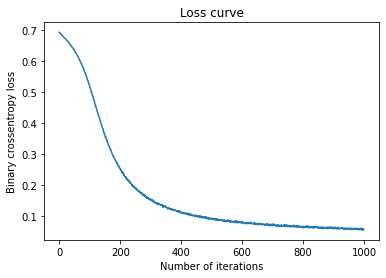

Accuracy: 0.9619047619047619
Test loss: [0.13064669]


In [ ]:
def plot_history(history):
    # Plot the learning curve after training.
    plt.plot(history)
    plt.title('Loss curve')
    plt.xlabel('Number of iterations')
    plt.ylabel('Binary crossentropy loss')
    plt.show()

plot_history(model.history)

X, _, _ = normalize(x_test, mean, std)
Y = y_test[:, None]
y_pred = model.predict(X)
loss = model.loss(Y, y_pred)
acc = np.sum(np.round(y_pred) - Y == 0) / len(Y)

print('Accuracy:', acc)
print('Test loss:', loss)

# Triangles vs Circles (Basic Shapes Dataset)

For more information, see: https://www.kaggle.com/cactus3/basicshapes

In [ ]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1Va88vwMwmToi0SFfdTo8_9TJsV4qdOXK" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1Va88vwMwmToi0SFfdTo8_9TJsV4qdOXK" -o circles_vs_triangles_data.pkl

In [ ]:
import pickle

with open('circles_vs_triangles_data.pkl', 'rb') as f:
    data = pickle.load(f)
features, labels = data['features'], data['labels']

## Data exploration and Pre-processing
Here we:
* Print the distribution of the labels.
* Plot some images (3 circles and 3 triangles).
* Randomly split the dataset to training and test sets. (Ratio should be 80-20.)
  * After splitting we chech that the distribution of the labels are similar. (Print the distribution of the labels.)
* Normalize the data between -1. and 1. (Use min-max scaling.)

In [ ]:
print('Distribution of the lables:', np.unique(labels, return_counts=True))

# Plot some images (3 circles and 3 triangles).
circle_indexes = [i for i, label in enumerate(labels) if label == 0]
triange_indexes = [i for i, label in enumerate(labels) if label == 1]

selected_circles = np.random.choice(circle_indexes, 3)
selected_triangles = np.random.choice(triange_indexes, 3)

plt.figure(figsize=(8,5))
for i, ind in enumerate(selected_circles):
  plt.subplot(2,3,i+1)
  plt.imshow(np.reshape(features[ind], (28,28)))
  plt.axis('off')

for i, ind in enumerate(selected_triangles):
  plt.subplot(2,3,i+4)
  plt.imshow(np.reshape(features[ind], (28,28)))
  plt.axis('off')

#split
train_mask = np.random.rand(len(features)) < 0.8

x_train = features[train_mask]
y_train = labels[train_mask]
x_test = features[~train_mask]
y_test = labels[~train_mask]

print('Training set:', x_train.shape)
print('Test set:', x_test.shape)
print('Distribution of the lables:\n\ttraining set:', np.unique(y_train, return_counts=True), '\n\ttest set:', np.unique(y_test, return_counts=True))

# normalization
x_train = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0) + 1e-6)
x_train = x_train * 2.0 - 1.0
x_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0) + 1e-6)
x_test = x_test * 2.0 - 1.0

print(x_train.shape, x_train.dtype, y_train.dtype)
y_train = y_train.astype(float)

## Define and train a model.
Here we:
* Define a simple convolutional network as follows: 2x(Conv2D with 4 [then 8 in the second time] (3x3) kernels and padding -> ReLU -> MaxPooling2D) -> Flatten -> Dense with 32 units -> Relu -> Dense -> Sigmoid
* Train it for 100 (or less if it is too slow...) epochs with a batch size of 16 using SGD optimizer with learning rate of 0.01. [These parameters can be changhed (e.g. lower the #epochs when training with the naive implementation, or if needed, increase the batch  or the learning rate, etc.). You can also use batch norm, it will perform better with it. *(Note: you may need to change the shape of gamma and beta if you want to use batchnorm after convolution)*]
* Plot the learning curve.
* Evaluate the trained model on the test set. (Loss, accuracy, precision, recall)

In [ ]:
np.random.seed(42)
# TODO: you might need to play with the learning rate and with the number of epochs

model = Model(loss=BinaryCrossentropy(), optimizer=SGD(0.01))
model.add(Conv2d(3, 1, 4, activation=Relu(), pad=1, use_fast=True))
model.add(Maxpool2d())
model.add(Conv2d(3, 4, 8, activation=Relu(), pad=1, use_fast=True))
model.add(Maxpool2d())
model.add(Flatten())
model.add(Dense((7*7*8, 8), activation=Relu()))
model.add(Dense((8, 1), activation=Sigmoid()))

model.train(x_train, y_train, 100, 16)

In [ ]:
plot_history(model.history)

pred = model.predict(x_test)
y_test = y_test.astype(np.float)
loss = model.loss(y_test, pred)
pred = np.round(pred)

acc = np.sum((pred - y_test) == 0) / len(y_test)

print('Accuracy:', acc)
print('Test loss:', loss)

tp = np.logical_and(pred == 1, y_test == 1)   
tn = np.logical_and(pred == 0, y_test == 0)    
fp = np.logical_and(pred == 1, y_test == 0)    
fn = np.logical_and(pred == 0, y_test == 1)    

precision = np.sum(tp) / np.sum(np.logical_or(tp, fp))
recall = np.sum(tp) / np.sum(np.logical_or(tp, fn))

print('Precision:', precision)
print('Recall:', recall)

In [ ]:
# For debugging: plot the weights
debug = True
if debug:
  fig = plt.figure(figsize=(16,20))

  i=0
  for l in model.layers:
    try:
      W = l.W
      b = l.b
      print(l.__class__)
    except Exception:
      continue
      
    Wh, Wbin = np.histogram(W.ravel(), bins=50)
    ax = fig.add_subplot(4, 2, 2*i+1, label=(i,'W'))
    ax.bar(Wbin[:-1], Wh, width=Wbin[1:]-Wbin[:-1], align='edge')
    
    bh, bbin = np.histogram(W.ravel(), bins=50)
    ax = fig.add_subplot(4, 2, 2*i+2, label=(i,'b'))
    ax.bar(bbin[:-1], bh, width=bbin[1:]-bbin[:-1], align='edge')
    
    i += 1